# FETAL HEALTH CLASSIFICATION

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1. Normal
2. Suspect
3. Pathological

In [259]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
%matplotlib inline

In [260]:
data = pd.read_csv('fetal_health.csv')

## Data summary

In [261]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [262]:
# data.info()

In [263]:
# data.describe()

### Cheking for null value

In [264]:
# print(data.isnull().sum())

### Data scaling

In [265]:
X = data.drop('fetal_health', axis=1)
y = pd.DataFrame(data['fetal_health'])
y = y.astype('int')

min_max_scaler = MinMaxScaler()
scaled_data =  min_max_scaler.fit_transform(X) 
scaled_data = pd.DataFrame(scaled_data, columns = X.columns)
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


### Splitting data

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training Models

In [254]:
classifier_dict = {
                   'OnevsRest':OneVsRestClassifier(SVC()), 
                   'MLP': MLPClassifier(), 
                   'KNN': KNeighborsClassifier(),
                   'Gaussian_process': GaussianProcessClassifier(),
                   'Decison_tree': DecisionTreeClassifier(),
                   'Random_forest': RandomForestClassifier(),
                   'ADA_boost': AdaBoostClassifier(),
                   'Gaussian_NB': GaussianNB(),
                   'Quadratic_Discriminant_Analysis': QuadraticDiscriminantAnalysis()
                  }

Training OnevsRest ........
              precision    recall  f1-score   support

      Normal       0.86      1.00      0.93       330
     Suspect       0.76      0.24      0.36        55
Pathological       0.93      0.63      0.75        41

    accuracy                           0.86       426
   macro avg       0.85      0.62      0.68       426
weighted avg       0.86      0.86      0.84       426

Accuracy of OnevsRest is 0.864
Training MLP ........


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

      Normal       0.95      0.90      0.92       330
     Suspect       0.51      0.78      0.61        55
Pathological       0.90      0.68      0.78        41

    accuracy                           0.86       426
   macro avg       0.79      0.79      0.77       426
weighted avg       0.89      0.86      0.87       426

Accuracy of MLP is 0.862
Training KNN ........
              precision    recall  f1-score   support

      Normal       0.92      0.98      0.95       330
     Suspect       0.76      0.62      0.68        55
Pathological       0.94      0.71      0.81        41

    accuracy                           0.91       426
   macro avg       0.87      0.77      0.81       426
weighted avg       0.90      0.91      0.90       426

Accuracy of KNN is 0.906


/home/hadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Gaussian_process ........
              precision    recall  f1-score   support

      Normal       0.96      0.53      0.68       330
     Suspect       0.77      0.31      0.44        55
Pathological       0.17      0.90      0.28        41

    accuracy                           0.54       426
   macro avg       0.63      0.58      0.47       426
weighted avg       0.86      0.54      0.61       426

Accuracy of Gaussian_process is 0.535
Training Decison_tree ........
              precision    recall  f1-score   support

      Normal       0.95      0.96      0.96       330
     Suspect       0.74      0.73      0.73        55
Pathological       0.97      0.88      0.92        41

    accuracy                           0.92       426
   macro avg       0.89      0.86      0.87       426
weighted avg       0.92      0.92      0.92       426

Accuracy of Decison_tree is 0.925
Training Random_forest ........


/home/hadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


              precision    recall  f1-score   support

      Normal       0.95      1.00      0.97       330
     Suspect       0.89      0.73      0.80        55
Pathological       0.97      0.85      0.91        41

    accuracy                           0.95       426
   macro avg       0.94      0.86      0.89       426
weighted avg       0.95      0.95      0.95       426

Accuracy of Random_forest is 0.948
Training ADA_boost ........


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

      Normal       0.89      0.94      0.92       330
     Suspect       0.63      0.62      0.62        55
Pathological       0.87      0.49      0.62        41

    accuracy                           0.86       426
   macro avg       0.80      0.68      0.72       426
weighted avg       0.86      0.86      0.85       426

Accuracy of ADA_boost is 0.857
Training Gaussian_NB ........
              precision    recall  f1-score   support

      Normal       0.98      0.84      0.91       330
     Suspect       0.46      0.85      0.59        55
Pathological       0.64      0.61      0.62        41

    accuracy                           0.82       426
   macro avg       0.69      0.77      0.71       426
weighted avg       0.88      0.82      0.84       426

Accuracy of Gaussian_NB is 0.822


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Quadratic_Discriminant_Analysis ........
              precision    recall  f1-score   support

      Normal       0.88      0.98      0.93       330
     Suspect       0.36      0.07      0.12        55
Pathological       0.63      0.78      0.70        41

    accuracy                           0.84       426
   macro avg       0.63      0.61      0.58       426
weighted avg       0.79      0.84      0.80       426

Accuracy of Quadratic_Discriminant_Analysis is 0.84


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


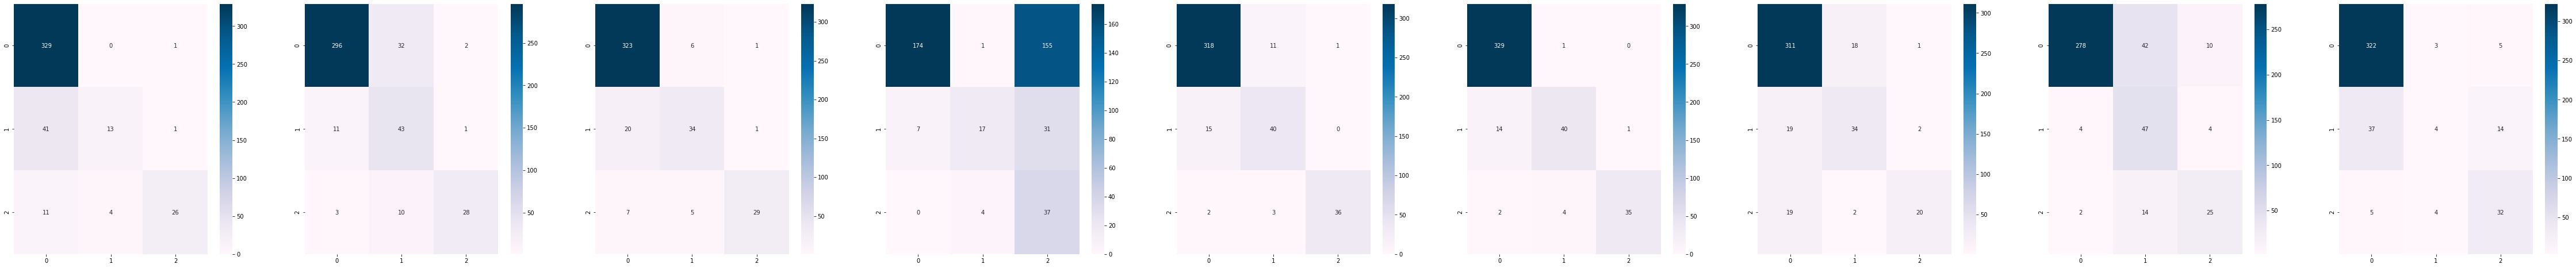

In [284]:
f = plt.figure(figsize=(80,8))
acc_list = []
    
for index, key in enumerate(classifier_dict):
    
    print(f'Training {key} ........')
    clf = classifier_dict[key].fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Classification report
    target_names = ['Normal', 'Suspect', 'Pathological']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    
    # Model Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {key} is {acc.round(3)}' ) 
    

    # Confusion matrix plot    
    f.add_subplot(1,9, index+1)
    con_mat = confusion_matrix(y_test, y_pred) 
    sns.heatmap(con_mat, annot=True, fmt='d', cmap='PuBu')
    
    acc_list.append(acc)
    

In [285]:
for index, value in enumerate(classifier_dict):
    if index == acc_list.index(max(acc_list)):
        print(f'{value} classifier has the maximum accuracy  = {max(acc_list).round(3)*100}%')

Random_forest classifier has the maximum accuracy  = 94.8%
